In [2]:
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Load and preprocess images

In [3]:
def load_image(path, target_size=(256, 256)):
    img = Image.open(tf.keras.utils.get_file(path.split('/')[-1], path)).convert('RGB')  # Load and convert
    img = img.resize(target_size)                                                        # Resize
    img = np.array(img) / 255.0                                                           # Normalize to [0, 1]
    return tf.constant(img, dtype=tf.float32)

# Content and style image URLs

In [4]:
content_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/YellowLabradorLooking_new.jpg"
style_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/Vassily_Kandinsky%2C_1913_-_Composition_7.jpg"

# Load content and style images

In [5]:
content_image = load_image(content_url)
style_image = load_image(style_url)

83281/83281 ━━━━━━━━━━━━━━━━━━━━ 0s 3us/step
195196/195196 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step


# Add batch dimension

In [6]:
content_image = tf.expand_dims(content_image, axis=0)
style_image = tf.expand_dims(style_image, axis=0)

# Load the style transfer model from TensorFlow Hub

In [7]:
style_transfer_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

# Apply style transfer

In [8]:
stylized_image = style_transfer_model(content_image, style_image)[0]  # Output image

# Display results

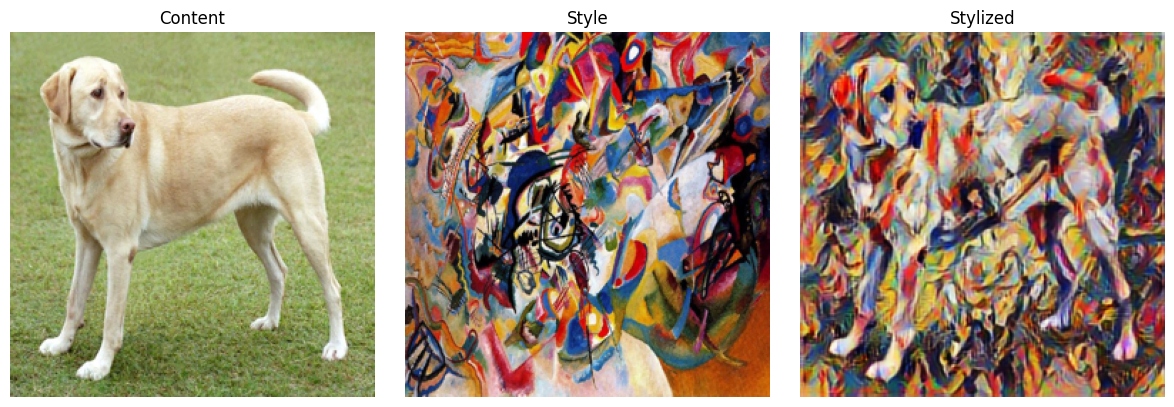

In [9]:
def show_image(img_tensor, title):
    img = tf.squeeze(img_tensor).numpy()  # Remove batch dimension
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')
 
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
show_image(content_image, "Content")
 
plt.subplot(1, 3, 2)
show_image(style_image, "Style")
 
plt.subplot(1, 3, 3)
show_image(stylized_image, "Stylized")
plt.tight_layout()
plt.show()